<a href="https://colab.research.google.com/github/jyha200/Mobi_Ubiq_Project/blob/main/scripts/apply_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker
!pip install -q pycocotools

     |████████████████████████████████| 616 kB 5.5 MB/s 
     |████████████████████████████████| 77 kB 4.6 MB/s 
     |████████████████████████████████| 237 kB 44.0 MB/s 
     |████████████████████████████████| 87 kB 5.2 MB/s 
     |████████████████████████████████| 120 kB 34.9 MB/s 
     |████████████████████████████████| 1.1 MB 43.8 MB/s 
     |████████████████████████████████| 1.2 MB 36.0 MB/s 
     |████████████████████████████████| 6.4 MB 36.1 MB/s 
     |████████████████████████████████| 3.4 MB 19.9 MB/s 
     |████████████████████████████████| 840 kB 40.9 MB/s 
     |████████████████████████████████| 596 kB 44.7 MB/s 
     |████████████████████████████████| 1.1 MB 49.8 MB/s 
     |████████████████████████████████| 462 kB 37.2 MB/s 
     |████████████████████████████████| 213 kB 48.0 MB/s 
     |████████████████████████████████| 25.3 MB 1.7 MB/s 
     |████████████████████████████████| 352 kB 43.9 MB/s 
     |████████████████████████████████| 99 kB 7.9 MB/s 
     |███████████████

In [75]:
import cv2

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector
import numpy as np
import os

import tensorflow as tf
assert tf.__version__.startswith('2')

from PIL import Image


In [ ]:
label_map= { 1:"machine", 
            2:"handwash",
            3:"nowater",
            4:"bleach_O",
            5:"bleach_X",
            6:"dryer_O", 
            7:"dryer_X", 
            8:"wring_O",
            9:"wring_X",
            10:"sun",
            11:"shade",
            12:"iron_O"            , 
            13:"iron_X", 
            14:"dryclean_O",
            15:"dryclean_X"}



In [102]:
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/ubiq/model.tflite")
interpreter.allocate_tensors()

In [103]:
def load_image(img_path, scaling):
    img = Image.open(img_path)
    img = img.resize([320, 320])
    img.load()
    data = np.uint8(img)

    # 스케일링 유무에 따라 결과가 달라진다. 하는 것이 좋은 결과를 만든다.
    # 학습할 때 스케일링을 적용했기 때문에 여기서도 적용하는 것이 맞다.
    ##if scaling:
    #    data /= 255
    return data



In [104]:
input_details = interpreter.get_input_details()
    # [{'name': 'conv2d_60_input', 'index': 3, 'shape': array([  1, 150, 150,   3], dtype=int32),
    #   'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]

    # 출력 텐서 정보 : 인덱스를 알아야 결과를 받아올 수 있다.
output_details = interpreter.get_output_details()
# [{'name': 'dense_41/Sigmoid', 'index': 18, 'shape': array([1, 1], dtype=int32),
#   'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]

print(input_details)

print(output_details)

[{'name': 'serving_default_images:0', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0078125, 127), 'quantization_parameters': {'scales': array([0.0078125], dtype=float32), 'zero_points': array([127], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:1', 'index': 600, 'shape': array([ 1, 25], dtype=int32), 'shape_signature': array([ 1, 25], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:3', 'index': 598, 'shape': array([ 1, 25,  4], dtype=int32), 'shape_signature': array([ 1, 25,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales

In [ ]:
result = []
images =[]
root_path="/content/drive/MyDrive/ubiq/dataset/test/jpg"
for file in os.listdir(root_path):
  image_path = root_path + '/' + file
  images.append(image_path)

#images = "/content/drive/MyDrive/ubiq/dataset/test_from_train/jpg/"
#images = ["/content/drive/MyDrive/ubiq/dataset/test_from_train/jpg/--_1_jpg.rf.013cd26c9465ac168bc1c18a5e32aa55.jpg"]
#images = ["/content/drive/MyDrive/ubiq/dataset/test/jpg/20220427_205219_jpg.rf.d5f082f5ed8acf0ac20902b0dd908e91.jpg"]
for img_path in images:
    input_data = load_image(img_path, scaling=True)
    input_data = input_data[np.newaxis]


In [105]:
# input_details = interpreter.get_input_details()
#     # [{'name': 'conv2d_60_input', 'index': 3, 'shape': array([  1, 150, 150,   3], dtype=int32),
#     #   'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]

#     # 출력 텐서 정보 : 인덱스를 알아야 결과를 받아올 수 있다.
# output_details = interpreter.get_output_details()
# # [{'name': 'dense_41/Sigmoid', 'index': 18, 'shape': array([1, 1], dtype=int32),
# #   'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]

# result = []
# images =[]
# root_path="/content/drive/MyDrive/ubiq/dataset/test/jpg"
# for file in os.listdir(root_path):
#   image_path = root_path + '/' + file
#   images.append(image_path)

# #images = "/content/drive/MyDrive/ubiq/dataset/test_from_train/jpg/"
# #images = ["/content/drive/MyDrive/ubiq/dataset/test_from_train/jpg/--_1_jpg.rf.013cd26c9465ac168bc1c18a5e32aa55.jpg"]
# #images = ["/content/drive/MyDrive/ubiq/dataset/test/jpg/20220427_205219_jpg.rf.d5f082f5ed8acf0ac20902b0dd908e91.jpg"]
# for img_path in images:
#     input_data = load_image(img_path, scaling=True)
#     input_data = input_data[np.newaxis]

#     # 입력 데이터 전달
#     interpreter.set_tensor(input_details[0]['index'], input_data)
#     interpreter.invoke()

#     # 출력 데이터 읽기
#     output_data = interpreter.get_tensor(output_details[0]['index'])
#     result.append(output_data)

# # 1차원 변환 출력
# print(result)
# print(np.reshape(result, -1))




[array([[0.48828125, 0.4609375 , 0.43359375, 0.37109375, 0.31640625,
        0.29296875, 0.28125   , 0.22265625, 0.21484375, 0.1796875 ,
        0.16796875, 0.15234375, 0.1328125 , 0.12109375, 0.1171875 ,
        0.109375  , 0.10546875, 0.09765625, 0.09765625, 0.09375   ,
        0.07421875, 0.07421875, 0.0625    , 0.0625    , 0.0625    ]],
      dtype=float32), array([[0.6640625 , 0.6015625 , 0.58984375, 0.5       , 0.44921875,
        0.421875  , 0.421875  , 0.421875  , 0.41015625, 0.29296875,
        0.16796875, 0.14453125, 0.14453125, 0.140625  , 0.12109375,
        0.1171875 , 0.109375  , 0.10546875, 0.10546875, 0.1015625 ,
        0.1015625 , 0.1015625 , 0.08984375, 0.08203125, 0.08203125]],
      dtype=float32), array([[0.5       , 0.421875  , 0.38671875, 0.38671875, 0.37109375,
        0.359375  , 0.3359375 , 0.21484375, 0.20703125, 0.17578125,
        0.140625  , 0.12890625, 0.12109375, 0.1015625 , 0.09765625,
        0.0859375 , 0.078125  , 0.078125  , 0.07421875, 0.0703125 ,

In [31]:
# print(output_details[0]['index'])

600


In [106]:
def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image

In [107]:


signature_fn = interpreter.get_signature_runner()
input_height = 320
input_width = 320
image_path = images[0]
preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Feed the input image to the model
output = signature_fn(images=preprocessed_image)

In [116]:
signature_fn = interpreter.get_signature_runner()
input_height = 320
input_width = 320

results_list = []
imgs = []

for image_path in images:
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Feed the input image to the model
  output = signature_fn(images=preprocessed_image)
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  threshold = 0.3
  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
      COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)
  results_list.append(results)

  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15

    ## here!!!!!
    #label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    label = "{}".format(label_map[obj['class_id']+1])
    cv2.putText(original_image_np, label, (xmin, ymin-5),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  img =Image.fromarray(original_uint8)
  imgs.append(img)
  img.show()

In [118]:
print(imgs)


[<PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127B1F990>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F012DC09850>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127B1F5D0>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127B7F390>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127B7F290>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127AF17D0>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127B7F6D0>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127B649D0>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127B1F910>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127B7F910>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127AF1690>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127B1F390>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127B1FB10>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F012C572910>, <PIL.Image.Image image mode=RGB size=416x416 at 0x7F0127B7F9D0>, <PIL.Image.Image image m

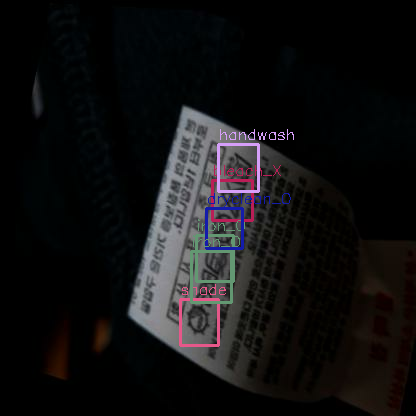

In [123]:
imgs[3]

In [129]:
size = len(imgs)
for i in range(0, size):
  imgs[i].save('/content/drive/MyDrive/ubiq/result_img/'+str(i)+'.jpg')

In [108]:
# count = int(np.squeeze(output['output_0']))
# scores = np.squeeze(output['output_1'])
# classes = np.squeeze(output['output_2'])
# boxes = np.squeeze(output['output_3'])

# threshold = 0.3
# results = []
# for i in range(count):
#   if scores[i] >= threshold:
#     result = {
#       'bounding_box': boxes[i],
#       'class_id': classes[i],
#       'score': scores[i]
#     }
#     results.append(result)

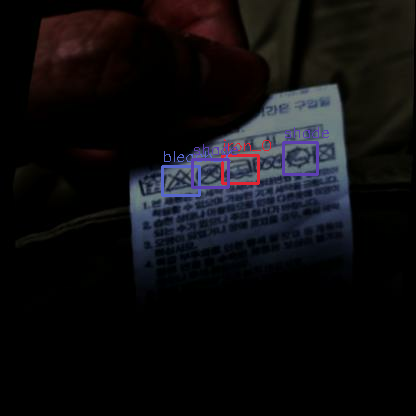

In [109]:
# COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

# original_image_np = original_image.numpy().astype(np.uint8)
# for obj in results:
#   # Convert the object bounding box from relative coordinates to absolute
#   # coordinates based on the original image resolution
#   ymin, xmin, ymax, xmax = obj['bounding_box']
#   xmin = int(xmin * original_image_np.shape[1])
#   xmax = int(xmax * original_image_np.shape[1])
#   ymin = int(ymin * original_image_np.shape[0])
#   ymax = int(ymax * original_image_np.shape[0])

#   # Find the class index of the current object
#   class_id = int(obj['class_id'])

#   # Draw the bounding box and label on the image
#   color = [int(c) for c in COLORS[class_id]]
#   cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
#   # Make adjustments to make the label visible for all objects
#   y = ymin - 15 if ymin - 15 > 15 else ymin + 15

#   ## here!!!!!
#   #label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
#   label = "{}".format(label_map[obj['class_id']+1])
#   cv2.putText(original_image_np, label, (xmin, ymin-5),
#       cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# # Return the final image
# original_uint8 = original_image_np.astype(np.uint8)
# Image.fromarray(original_uint8)


In [110]:
# print(results)

[{'bounding_box': array([0.3739597 , 0.5343796 , 0.44116768, 0.6208751 ], dtype=float32), 'class_id': 11.0, 'score': 0.47265625}, {'bounding_box': array([0.40048674, 0.39116234, 0.47102275, 0.47918367], dtype=float32), 'class_id': 4.0, 'score': 0.47265625}, {'bounding_box': array([0.3838323 , 0.46184778, 0.4510403 , 0.5483433 ], dtype=float32), 'class_id': 10.0, 'score': 0.44921875}, {'bounding_box': array([0.3435273 , 0.68160516, 0.41974536, 0.7640764 ], dtype=float32), 'class_id': 10.0, 'score': 0.37109375}]


In [84]:
# print(scores)
# print(scores.size)
# print(output['output_2'])

# print(output['output_2'].size)
# print(boxes.size)

[0.32421875 0.3046875  0.2421875  0.1875     0.1796875  0.15234375
 0.1171875  0.109375   0.10546875 0.0859375  0.07421875 0.06640625
 0.06640625 0.0546875  0.05078125 0.05078125 0.046875   0.046875
 0.046875   0.04296875 0.04296875 0.04296875 0.04296875 0.04296875
 0.0390625 ]
25
[[ 4.  1.  1.  4.  6.  4.  6. 11.  4. 11.  6.  4.  0.  4.  6.  6.  6.  0.
  11. 11.  4. 11.  4.  4.  6.]]
25
100
